---

# RSI study of  10 Years of INTC Daily Data

---


In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np

In [65]:
def _ta_RSI(df, n=14):
    # https://github.com/wgong/mplfinance/blob/master/examples/rsi.py
#     diff = df.Close.diff().values
    diff = df.w_p.diff().values
    gains = diff
    losses = -diff
    with np.errstate(invalid='ignore'):
        gains[(gains<0)|np.isnan(gains)] = 0.0
        losses[(losses<=0)|np.isnan(losses)] = 1e-10 # we don't want divide by zero/NaN
    m = (n-1) / n
    ni = 1 / n
    g = gains[n] = np.nanmean(gains[:n])
    l = losses[n] = np.nanmean(losses[:n])
    gains[:n] = losses[:n] = np.nan
    for i,v in enumerate(gains[n:],n):
        g = gains[i] = ni*v + m*g
    for i,v in enumerate(losses[n:],n):
        l = losses[i] = ni*v + m*l
    rs = gains / losses
#     df['rsi'] = 100 - (100/(1+rs))
    return 100 - (100/(1+rs))

In [3]:
df = pd.read_csv('data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(2335, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,3.976563,4.000975,3.937500,3.984375,2.669861,41721600
1995-01-04,4.000000,4.023438,3.953125,3.976563,2.664625,41865600
1995-01-05,3.984375,4.062500,3.976563,4.007813,2.685566,60480000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-06,28.25,28.450001,28.040001,28.270000,19.368675,70147800
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


In [16]:
LEN = df.shape[0]
SPAN = 120

In [17]:
ix_start, ix_stop = (-LEN) , (-LEN+SPAN)
df_1 = df.iloc[ix_start : ix_stop]
df_1.shape
df_1

(120, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,3.976563,4.000975,3.937500,3.984375,2.669861,41721600
1995-01-04,4.000000,4.023438,3.953125,3.976563,2.664625,41865600
1995-01-05,3.984375,4.062500,3.976563,4.007813,2.685566,60480000
1995-01-06,4.007813,4.070313,4.000000,4.062500,2.722212,56316800
1995-01-09,4.054688,4.125000,4.054688,4.125000,2.764089,75056000
...,...,...,...,...,...,...
1995-06-16,7.218750,7.335938,7.156250,7.257813,4.870484,122411200
1995-06-19,7.312500,7.765625,7.296875,7.718750,5.179803,127876000
1995-06-20,7.921875,8.140625,7.828125,8.125000,5.452423,141030400


In [21]:
df.iloc[ix_start].name, df.iloc[ix_stop-1].name

(Timestamp('1995-01-03 00:00:00'), Timestamp('1995-06-23 00:00:00'))

Interesting that iloc slicing is exclusive, but loc slicing is inclusive

In [23]:
df_2 = df.loc[df.iloc[ix_start].name : df.iloc[ix_stop-1].name] 
df_2.shape
df_2

(120, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,3.976563,4.000975,3.937500,3.984375,2.669861,41721600
1995-01-04,4.000000,4.023438,3.953125,3.976563,2.664625,41865600
1995-01-05,3.984375,4.062500,3.976563,4.007813,2.685566,60480000
1995-01-06,4.007813,4.070313,4.000000,4.062500,2.722212,56316800
1995-01-09,4.054688,4.125000,4.054688,4.125000,2.764089,75056000
...,...,...,...,...,...,...
1995-06-16,7.218750,7.335938,7.156250,7.257813,4.870484,122411200
1995-06-19,7.312500,7.765625,7.296875,7.718750,5.179803,127876000
1995-06-20,7.921875,8.140625,7.828125,8.125000,5.452423,141030400


---

#### We can, of course, plot a basic ohlc or candlestick plot:

'0.12.8b9'

C:\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


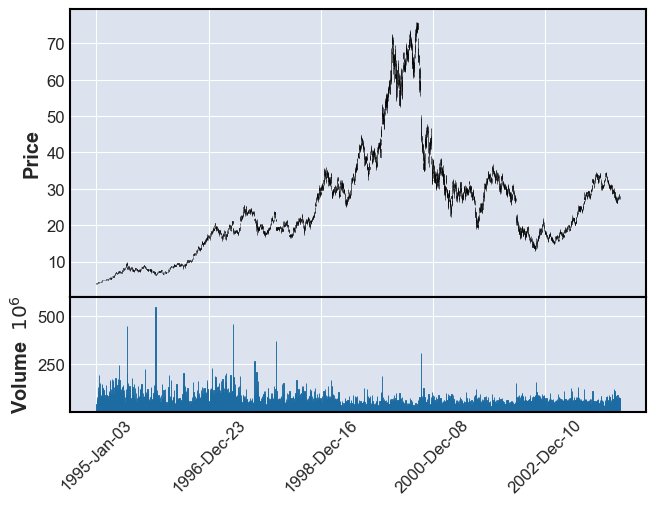

In [11]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True,type='candle')

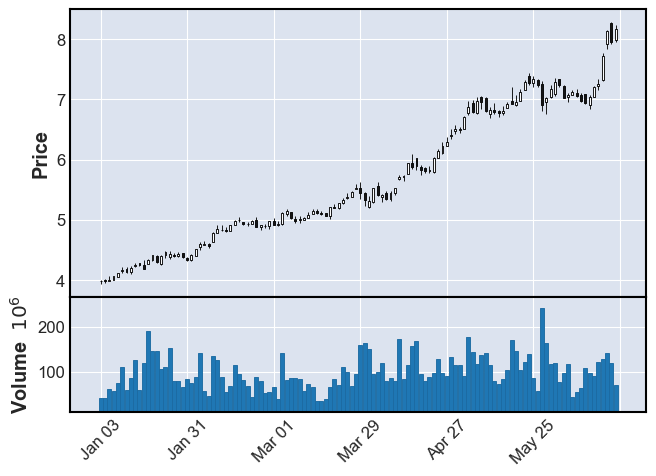

In [24]:
mpf.plot(df_1,volume=True,type='candle')

In [52]:
RSI_PERIOD, RSI_AVG = 100, 25
band_width = 0.6

In [66]:
df["w_p"] = 0.25*(2*df["Close"] + df["High"] + df["Low"])
df["rsi"] = _ta_RSI(df,n=RSI_PERIOD)
df["rsi_avg"] = df.rsi.ewm(span=RSI_AVG).mean()
df["rsi_u"] = df["rsi_avg"] + band_width
df["rsi_d"] = df['rsi_avg'] - band_width
df["rsi_50"] = 50

In [69]:
SPAN = 200
OVERLAP = 40
intervals = []
for ix_stop in range(LEN, RSI_PERIOD, -SPAN):
    ix_start = ix_stop - SPAN -int(OVERLAP/2)
    intervals.append((ix_start if ix_start > 0 else 0, ix_stop+int(OVERLAP/2)))
#     df_1 = df.iloc[ix_start : ix_stop]
    # df_1.shape
#     print(f"chart-{num}")
#     df_1

<ipython-input-70-562d0bafc579>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["rsi_50"] = rsi_min


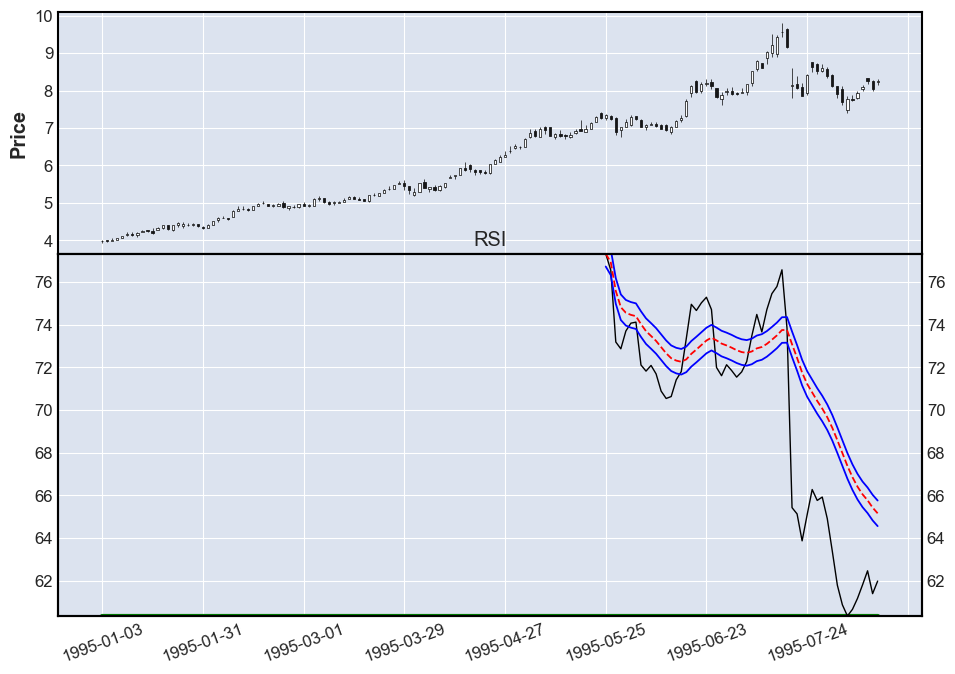

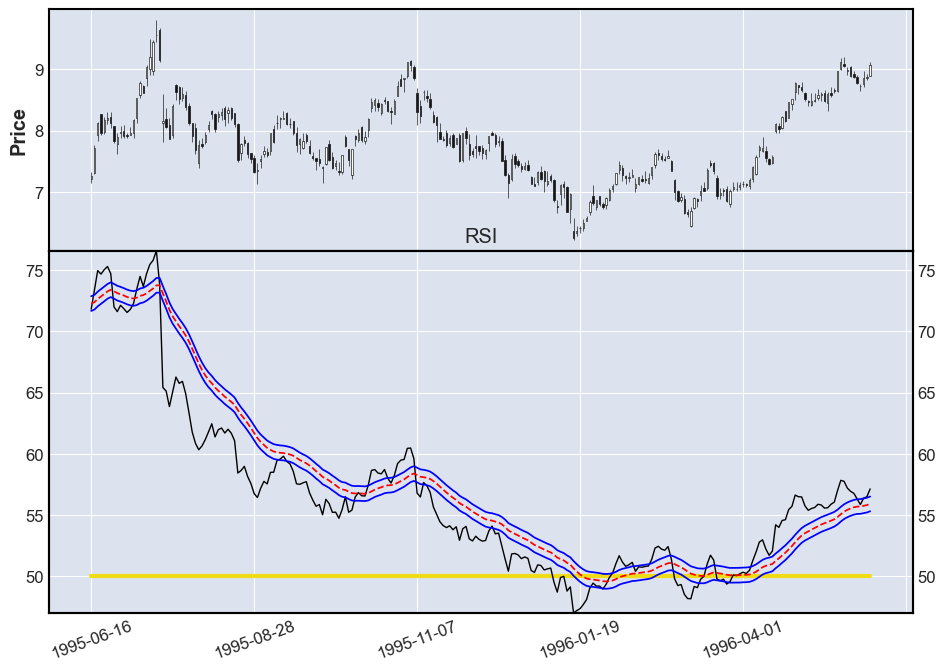

<ipython-input-70-562d0bafc579>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["rsi_50"] = rsi_min


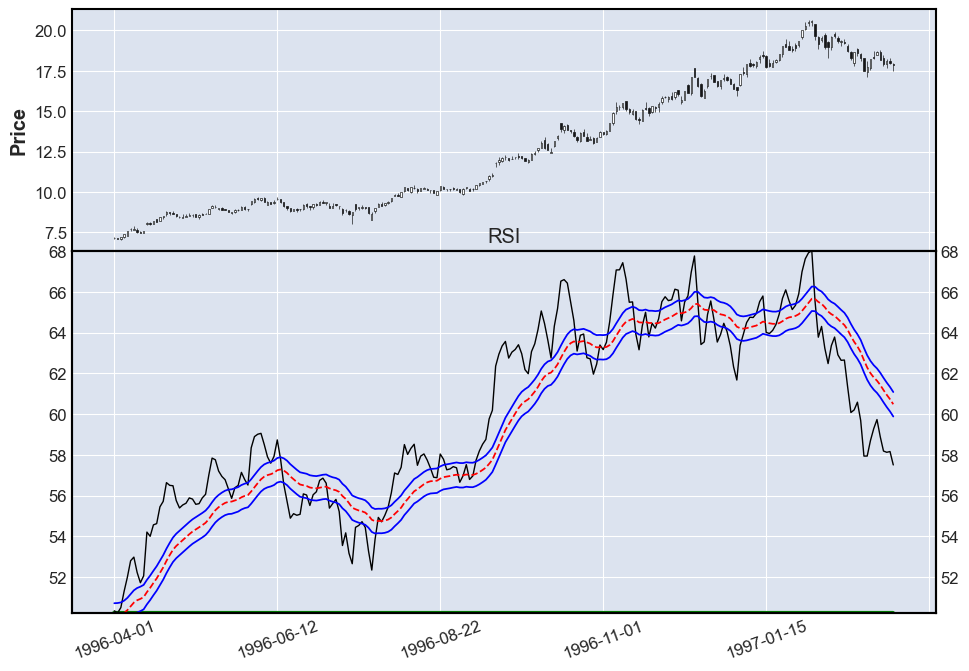

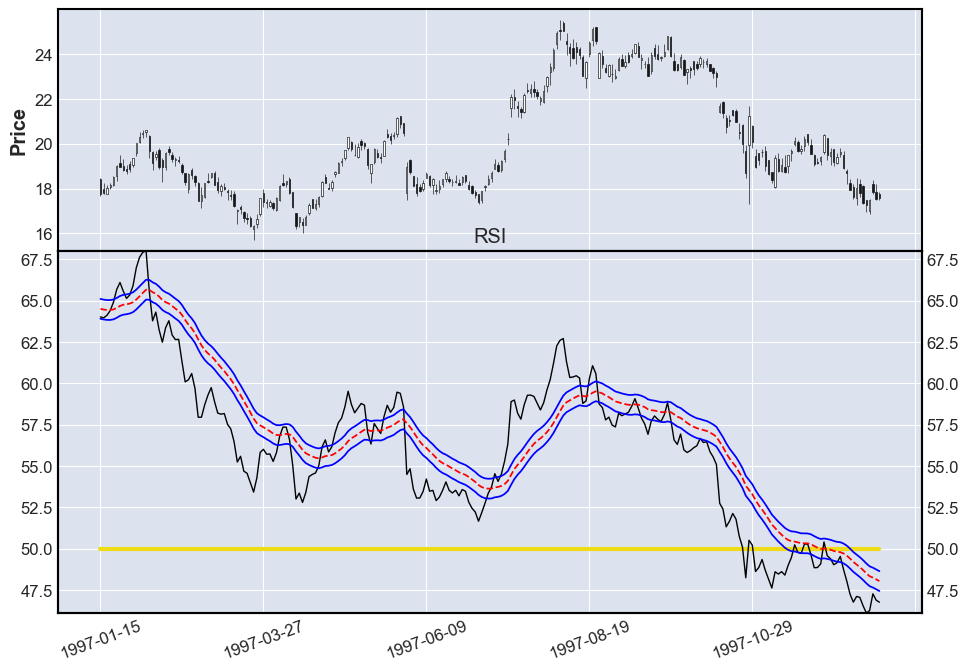

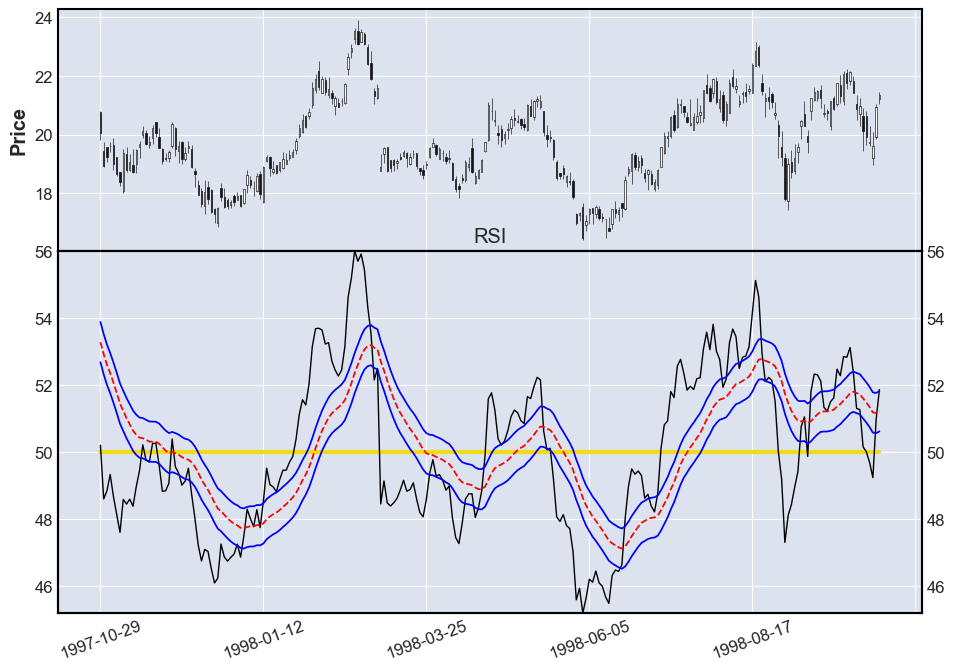

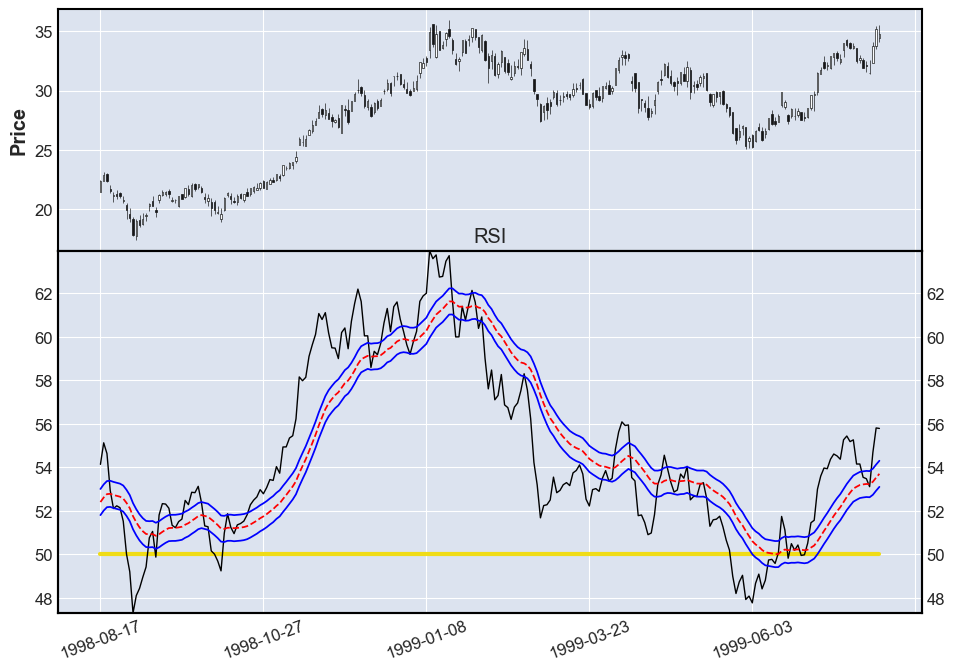

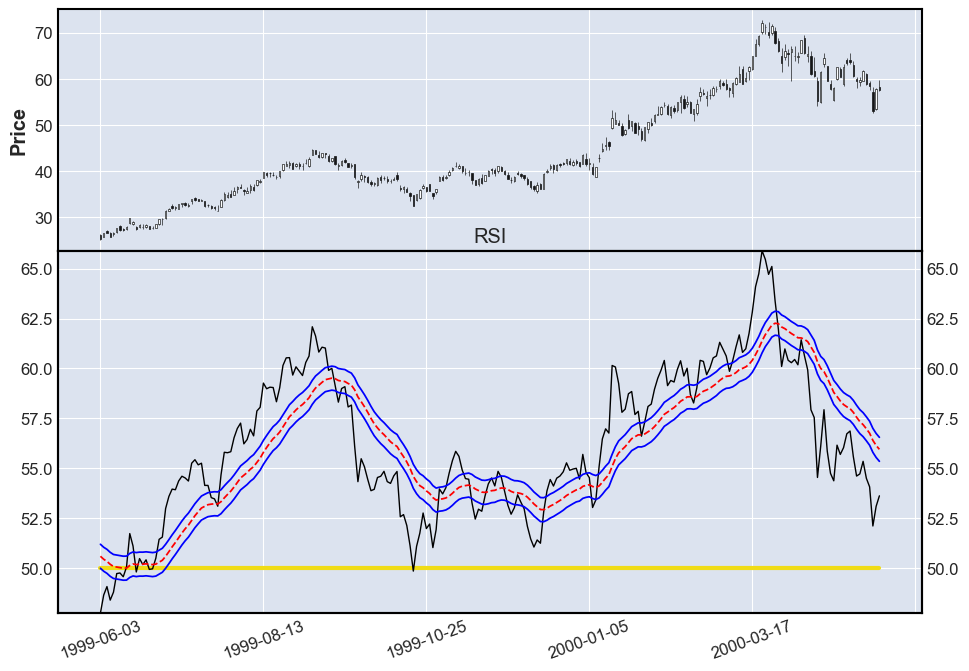

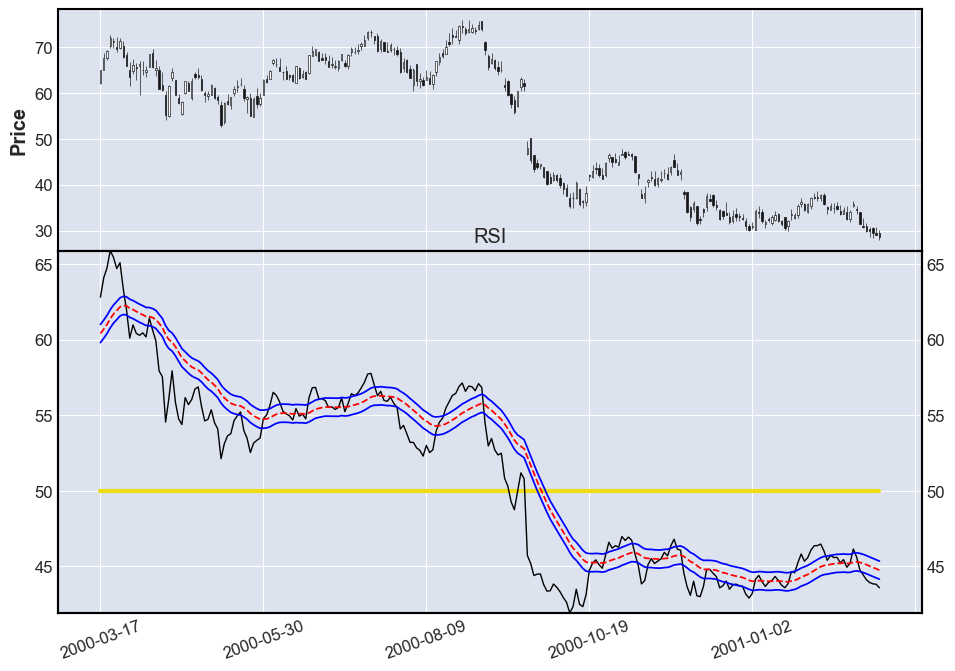

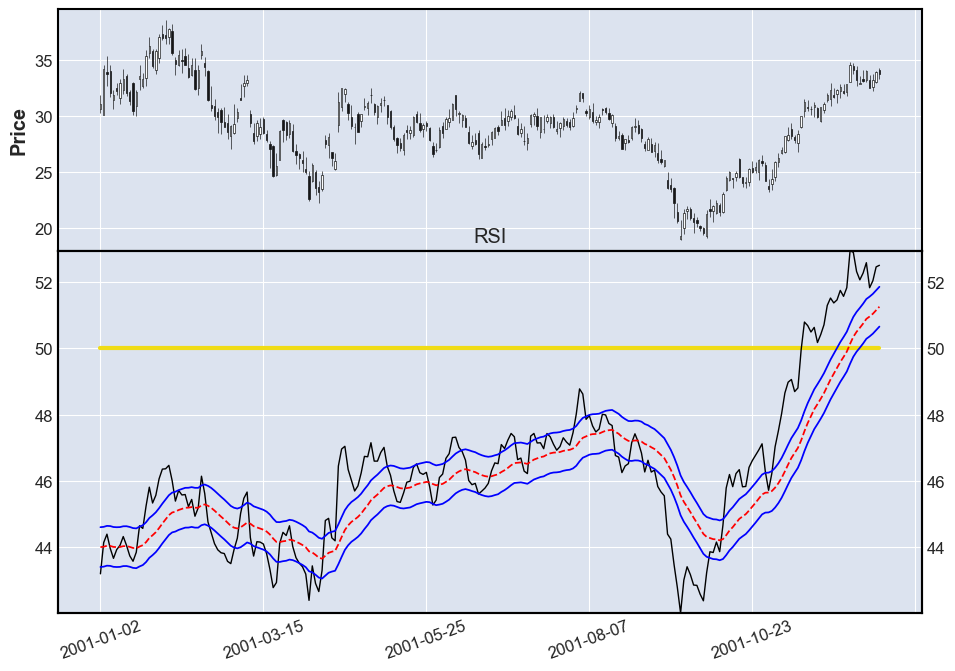

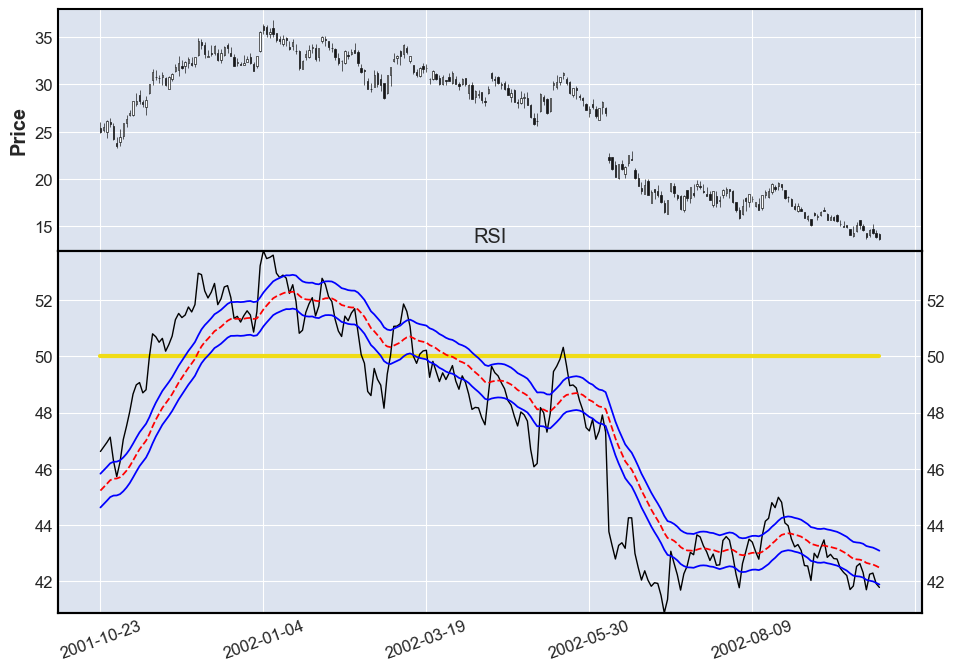

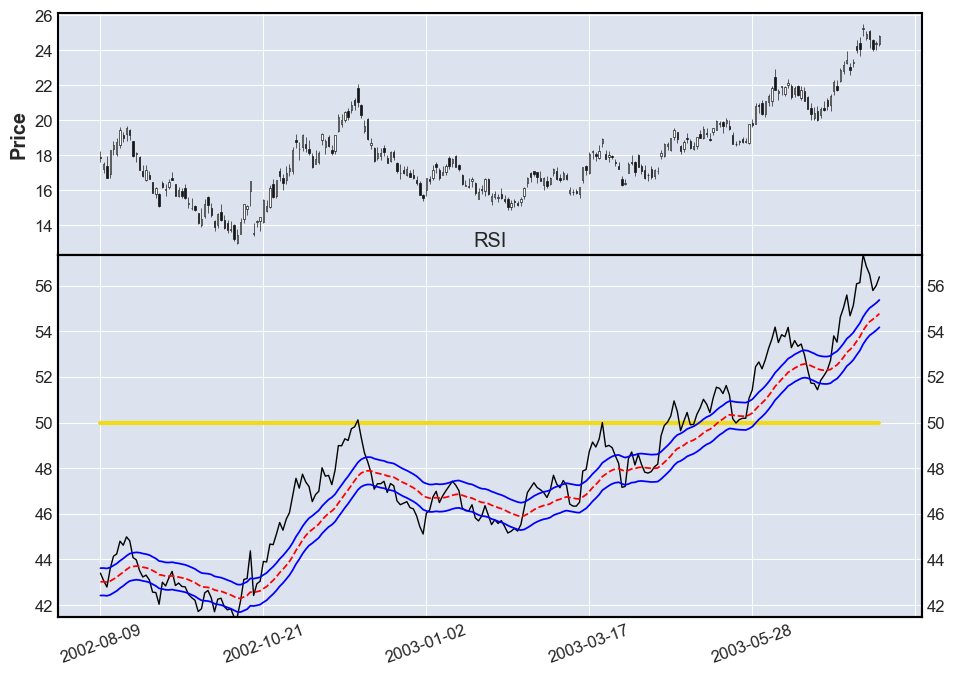

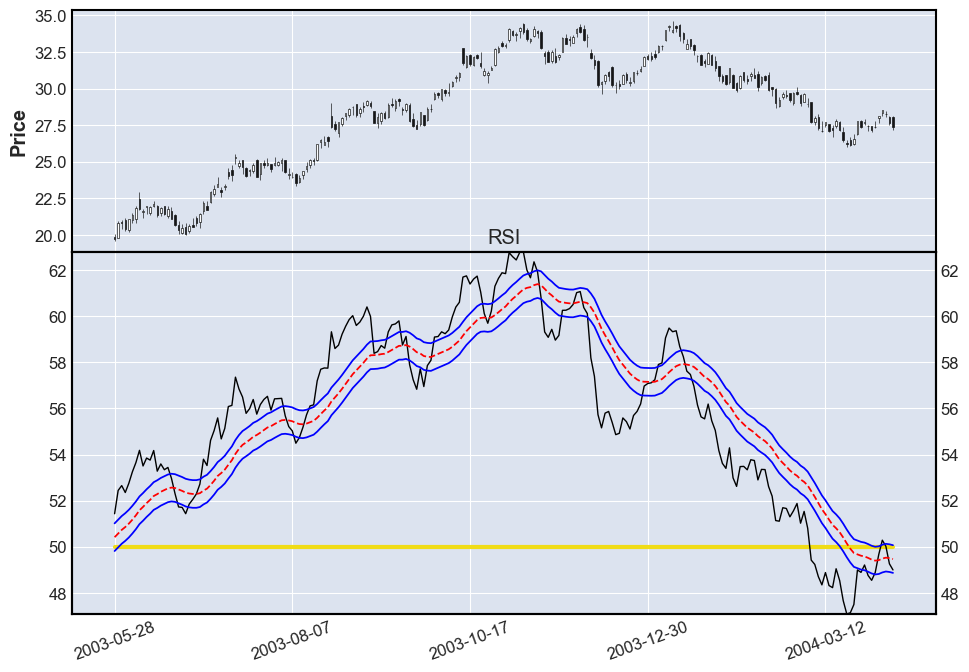

In [70]:
for ix_start,ix_stop in intervals[::-1]:
    df_1 = df.iloc[ix_start : ix_stop]
    rsi_min = df_1.min(axis=0)[["rsi"]].min()
    rsi_max = df_1.max(axis=0)[["rsi"]].max()
    rsi_50_color = "#F0DC16"  # yellow
    if rsi_min >= 50:
        df_1["rsi_50"] = rsi_min
        rsi_50_color = "g"
    if rsi_max <= 50:
        df_1["rsi_50"] = rsi_max
        rsi_50_color = "r"
    rsi_50_plot = mpf.make_addplot(df_1["rsi_50"], panel=1, color=rsi_50_color, width=3, linestyle="solid", ylim=(rsi_min,rsi_max))
    rsi_plot = mpf.make_addplot(df_1["rsi"], panel=1, color='black', width=1, title="RSI", ylim=(rsi_min,rsi_max))
    rsi_avg_plot = mpf.make_addplot(df_1["rsi_avg"], panel=1, color='red', linestyle="dashed", ylim=(rsi_min,rsi_max))
    rsi_u_plot = mpf.make_addplot(df_1["rsi_u"], panel=1, color='b', ylim=(rsi_min,rsi_max))
    rsi_d_plot = mpf.make_addplot(df_1["rsi_d"], panel=1, color='b', ylim=(rsi_min,rsi_max))

    plots = [
            # panel-1
            rsi_50_plot, rsi_plot, rsi_avg_plot, rsi_u_plot, rsi_d_plot 
        ]

    mpf.plot(df_1,type='candle',volume=False,figscale=1.5,addplot=plots,panel_ratios=(1,1.5), xrotation=20, datetime_format='%Y-%m-%d')

## resample

In [5]:
aggregation = {'Open'  :'first',
               'High'  :'max',
               'Low'   :'min',
               'Close' :'last',
               'Volume':'sum'}
dfw = df.resample('1W').agg(aggregation)
dfm = df.resample('1M').agg(aggregation)
dfq = df.resample('1Q').agg(aggregation)

C:\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


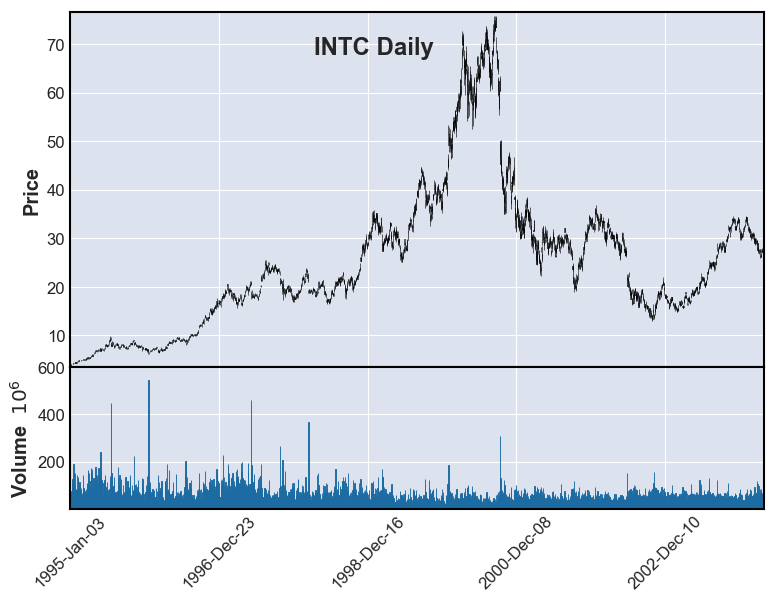

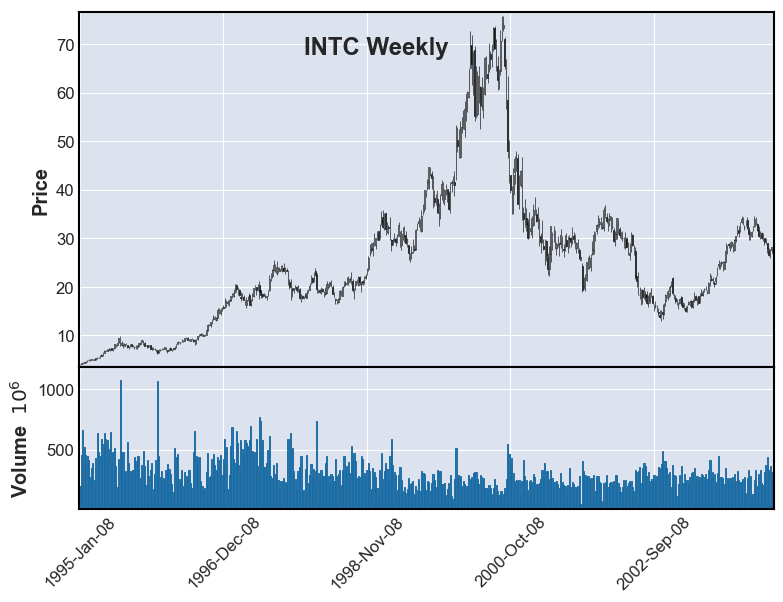

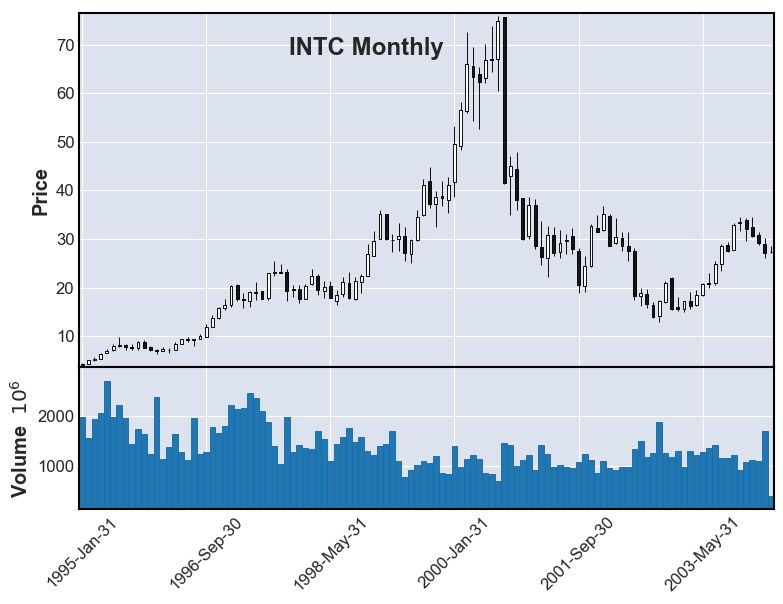

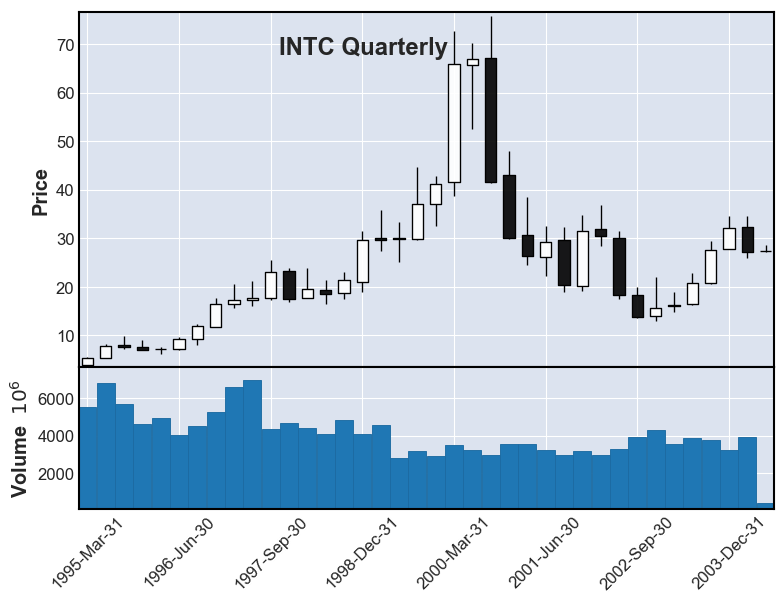

In [6]:
kwargs=dict(volume=True,type='candle',tight_layout=True)
mpf.plot(df,**kwargs,title='\nINTC Daily   ')
mpf.plot(dfw,**kwargs,title='\nINTC Weekly     ')
mpf.plot(dfm,**kwargs,title='\nINTC Monthly        ')
mpf.plot(dfq,**kwargs,title='\nINTC Quarterly         ')